In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from sklearn.model_selection import train_test_split

2022-11-29 12:06:34.411735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 12:06:34.499529: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-29 12:06:34.499546: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-29 12:06:34.997083: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

### Parse and Load DataSet. Input Dims: (None, 512)

In [99]:
X_mean_agitated= np.load("datasets/agitated_dataset/mean_agitated890.npy")
X_std_agitated= np.load("datasets/agitated_dataset/std_agitated890.npy")
y_agitated= np.ones(shape=(X_mean_agitated.shape[0],))


X_mean_normal= np.load("datasets/neg_dataset/mean_normal742.npy")
X_std_normal= np.load("datasets/neg_dataset/std_normal742.npy")
y_normal= np.zeros(shape=(X_mean_normal.shape[0],))

print("Agitated: " + str(X_mean_agitated.shape))
print("Normal: " + str(X_mean_normal.shape))

tot_samples= X_mean_agitated.shape[0] + X_mean_normal.shape[0]

##Create DataSet
X= np.zeros(shape=(tot_samples, 512))
y= np.zeros(shape=(tot_samples,))

X[0:890,0:256]= X_mean_agitated
X[890:,0:256]= X_mean_normal
X[0:890,256:]= X_std_agitated
X[890:,256:]= X_std_normal
y[0:890]= y_agitated
y[890:]= y_normal

print("X: " + str(X.shape))
print("y: " + str(y.shape))


print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))

Agitated: (890, 256)
Normal: (742, 256)
X: (1632, 512)
y: (1632,)
X_train: (979, 512)
X_test: (653, 512)


### Import Data (Clean Cell)

In [31]:
X_cls_normal= np.load("X_cls_normal661.npy")
X_cls_agitated= np.load("X_cls_agitated890.npy")[0:300]
m= X_cls_agitated.shape[0] + X_cls_normal.shape[0] #nbr of training examples

X_cls= np.zeros(shape=(m, 512))
y_cls= np.zeros(shape=(m,))

X_cls[0:X_cls_agitated.shape[0],:]= X_cls_agitated
X_cls[X_cls_agitated.shape[0]:,:]= X_cls_normal
y_cls[0:X_cls_agitated.shape[0]]= 1
y_cls[X_cls_agitated.shape[0]:]= 0

print("X_cls: " + str(X_cls.shape))
print("y_cls: " + str(y_cls.shape))

X_train, X_test, y_train, y_test= train_test_split(X_cls,y_cls, test_size=0.40, shuffle=True, random_state=43)

print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))
print(y_train)

X_cls: (961, 512)
y_cls: (961,)
X_train: (576, 512)
X_test: (385, 512)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1

### All 65536 dimensions of encoded inputs

In [2]:
X_cls_normal= np.load("X_cls_normal661_flattened.npy")
X_cls_agitated= np.load("X_cls_agitated890_flattened.npy")[0:660]
m= X_cls_agitated.shape[0] + X_cls_normal.shape[0] #nbr of training examples

X_cls= np.zeros(shape=(m, X_cls_normal.shape[1]))
y_cls= np.zeros(shape=(m,))

X_cls[0:X_cls_agitated.shape[0],:]= X_cls_agitated
X_cls[X_cls_agitated.shape[0]:,:]= X_cls_normal
y_cls[0:X_cls_agitated.shape[0]]= 1
y_cls[X_cls_agitated.shape[0]:]= 0


X_cls= X_cls.astype(np.float32)
y_cls= y_cls.astype(np.float32)

X_train, X_test, y_train, y_test= train_test_split(X_cls,y_cls, test_size=0.30, shuffle=True, random_state=17)

print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))
print("y_train: " + str(y_train.shape))
print("y_test: " + str(y_test.shape))


X_train: (924, 65536)
X_test: (397, 65536)
y_train: (924,)
y_test: (397,)


### Create Model

In [7]:
# inputs= tf.keras.layers.Input(shape=(512,))
# x= tf.keras.layers.BatchNormalization()(inputs)
# x= tf.keras.layers.Dropout(rate=0.30)(x)
# x= tf.keras.layers.Dense(units=128, activation='tanh')(x)
# x= tf.keras.layers.BatchNormalization()(x)
# x= tf.keras.layers.Dropout(rate=0.30)(x)
# x= tf.keras.layers.Dense(units=64, activation='tanh')(x)
# x= tf.keras.layers.BatchNormalization()(x)
# outputs= tf.keras.layers.Dense(units=1, activation='sigmoid')(x)
# classifier= tf.keras.Model(inputs=inputs, outputs=outputs)
# classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.Hinge(), metrics=['Accuracy'])
# classifier.summary()


inputs= tf.keras.layers.Input(shape=(65536,))
#x= tf.keras.layers.Dense(units= 256, activation="tanh")(inputs)
x= tf.keras.layers.BatchNormalization()(inputs)
outputs= tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)(x)


new_cls= tf.keras.Model(inputs=inputs, outputs=outputs)
new_cls.compile(optimizer= 'adam', loss='Hinge', metrics= ['Accuracy'])


In [8]:
cls_hist= new_cls.fit(x=X_train, y= y_train, epochs=15, validation_data=(X_test,y_test), batch_size=X_train.shape[0])
#cls_hist= classifier.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=10, batch_size=X_train.shape[0])


Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 1.0028 - Accuracy: 0.4481 - val_loss: 0.8207 - val_Accuracy: 0.6902
Epoch 2/15
1/1 [==============================] - 0s 435ms/step - loss: 0.8368 - Accuracy: 0.6656 - val_loss: 0.7780 - val_Accuracy: 0.7204
Epoch 3/15
1/1 [==============================] - 0s 441ms/step - loss: 0.7896 - Accuracy: 0.7067 - val_loss: 0.7509 - val_Accuracy: 0.7557
Epoch 4/15
1/1 [==============================] - 0s 445ms/step - loss: 0.7553 - Accuracy: 0.7424 - val_loss: 0.7319 - val_Accuracy: 0.7683
Epoch 5/15
1/1 [==============================] - 0s 449ms/step - loss: 0.7202 - Accuracy: 0.7835 - val_loss: 0.7129 - val_Accuracy: 0.7884
Epoch 6/15
1/1 [==============================] - 0s 444ms/step - loss: 0.6753 - Accuracy: 0.8301 - val_loss: 0.6926 - val_Accuracy: 0.8035
Epoch 7/15
1/1 [==============================] - 0s 457ms/step - loss: 0.6373 - Accuracy: 0.8615 - val_loss: 0.6553 - val_Accuracy: 0.8388
Epoch 8/15
1/1 [=======

Text(0.5, 1.0, 'Loss: Hinge')

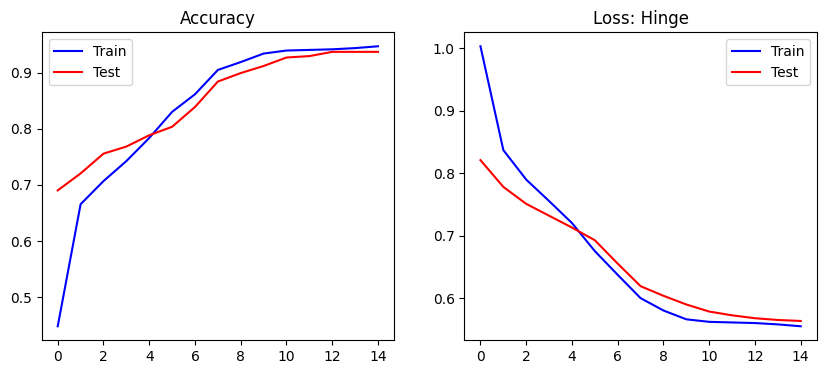

In [9]:
fig,ax= plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].plot(cls_hist.history['Accuracy'], color='blue')
ax[0].plot(cls_hist.history['val_Accuracy'], color='red')
ax[0].set_title('Accuracy')
ax[0].legend(['Train', 'Test'])

ax[1].plot(cls_hist.history['loss'], color='blue')
ax[1].plot(cls_hist.history['val_loss'], color='red')
ax[1].legend(['Train', 'Test'])
ax[1].set_title("Loss: " + str(new_cls.loss))


In [10]:
new_cls.evaluate(X_test,y_test)
new_cls.save("classifier_new_v3")


13/13 [==============================] - 0s 4ms/step - loss: 0.5635 - Accuracy: 0.9370


INFO:tensorflow:Assets written to: classifier_new_v3/assets


INFO:tensorflow:Assets written to: classifier_new_v3/assets


### Confusion Matrix
file://home/idrees/Downloads/confusionmatrix.png


In [147]:
#Traun set
y_pred_train= classifier.predict(X_train)
y_pred_train[(y_pred_train >=0.5)] =1 
y_pred_train[(y_pred_train <0.5)] = 0
conf_mtx_train= tf.math.confusion_matrix(y_train,y_pred_train)
# print(conf_mtx_train)

#Test set
y_pred_test= classifier.predict(X_test)
y_pred_test[(y_pred_test >=0.5)] =1 
y_pred_test[(y_pred_test <0.5)] = 0
conf_mtx_test= tf.math.confusion_matrix(y_test,y_pred_test)
print(conf_mtx_test)

TP= conf_mtx_test[0,0]
FP= conf_mtx_test[0,1]
prec= TP/(TP+FP) 

print("Test Precsion: " +str(prec))

21/21 [==============================] - 0s 615us/step
tf.Tensor(
[[255  41]
 [ 17 340]], shape=(2, 2), dtype=int32)
Test Precsion: tf.Tensor(0.8614864864864865, shape=(), dtype=float64)


In [108]:


conf_mtx= tf.math.confusion_matrix(y_test,y_pred_test)

print(conf_mtx)

tf.Tensor(
[[291   5]
 [256 101]], shape=(2, 2), dtype=int32)


In [116]:
##Create DataSet
X_realtime= np.zeros(shape=(1, 512))

X_test_mean= np.load("datasets/test_dataset/mean_X_test_normal.npy")
X_test_std= np.load("datasets/test_dataset/std_X_test_normal.npy")

X_realtime[:,0:256]= X_test_mean
X_realtime[:, 256:]= X_test_std

X_realtime.shape


(1, 512)

In [118]:
classifier.predict(X_realtime)

1/1 [==============================] - 0s 13ms/step


array([[0.99744767]], dtype=float32)

In [107]:
X_train.shape

(979, 512)

In [122]:
y_pred_train= classifier.predict(X_train)


y_pred_train.shape

31/31 [==============================] - 0s 847us/step


(979, 1)

In [139]:
y_pred_train[(y_pred_train >=0.5)] =1 
y_pred_train[(y_pred_train <0.5)] = 0
y_pred_train


array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],